In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [9]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

class KMeans:
    def __init__(self,K=5,max_iters=100,plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # Initialise clusters with an empty list which will eventually hold all data points belonging to the cluster
        self.clusters = [[] for _ in range(self.K)]
        
        # Store the centers (mean vector for each cluster)
        self.centroids = []
    
    def predict(self,X):
        # X is a numpy nd array
        self.X = X
        self.n_samples, self.n_features = X.shape[0], X.shape[1]

        # Initialise centroids
        # random_sample_idxs = np.random.choice(self.n_samples,self.K,replace=False)
        random_sample_idxs = []
        for i in range(self.K):
            random_sample_idxs.append(np.random.choice(self.n_samples,replace=False))

        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimise clusters
        for _ in range(self.max_iters):
            # assign samples to the closest centroid
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculatge new centroid from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old,self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify the samples as the idx of the clutsers
        
        return self._get_cluster_labels(self.clusters)
            
    def _get_cluster_labels(self,clusters):
        # each sample will get the label of the cluster it was assigned to 
        labels = np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx]=cluster_idx
        return labels

    def _create_clusters(self,centroids):
        # assign a cluster to each of the sample datapoints based on the euclidean distance to the current centroids
        clusters = [[] for _ in range(self.K)]
        for idx,sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self,sample,centroids):
        # distannce of the current sample to each centroid
        distances = [euclidean_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    
    def _get_centroids(self, clusters):
        # assign the mean value of the clusters to the centroids
        centroids = np.zeros((self.K,self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            # self.X[cluster] will return a new array that contains only the data points in self.X that correspond to the indices in cluster
            cluster_mean = np.mean(self.X[cluster],axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self,centroids_old,centroids_new):
        # distances between old and new centroids for all centroids
        distances = []
        for i in range(self.K):
            distances.append(euclidean_distance(centroids_old[i],centroids_new[i]))
        return sum(distances) == 0
     
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))

        for i,index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point,marker='x',color="black",linewidth=2)
        
        plt.show()

(500, 2)
3


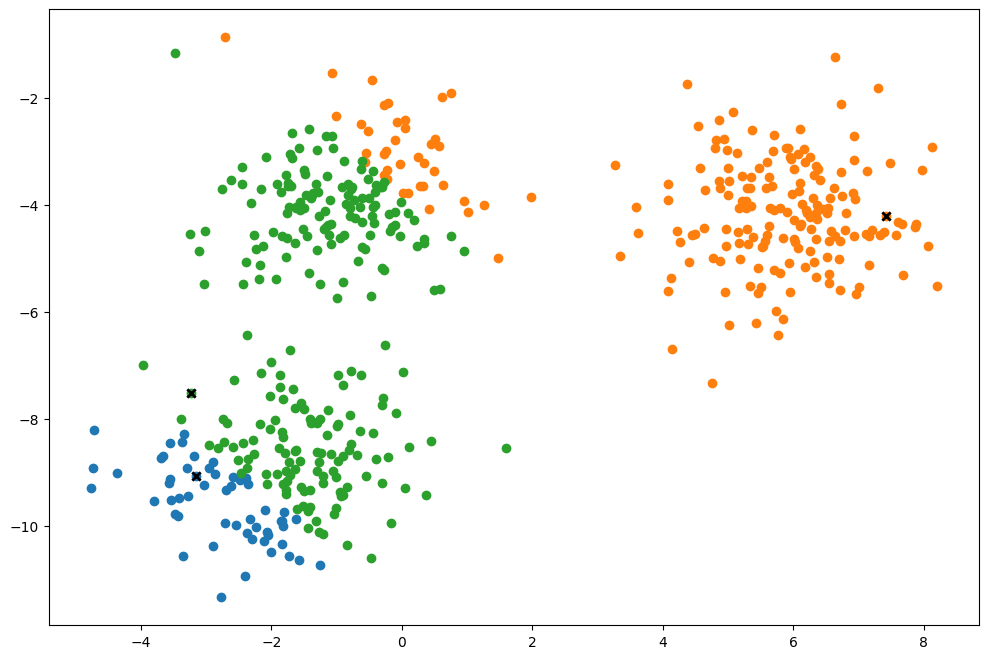

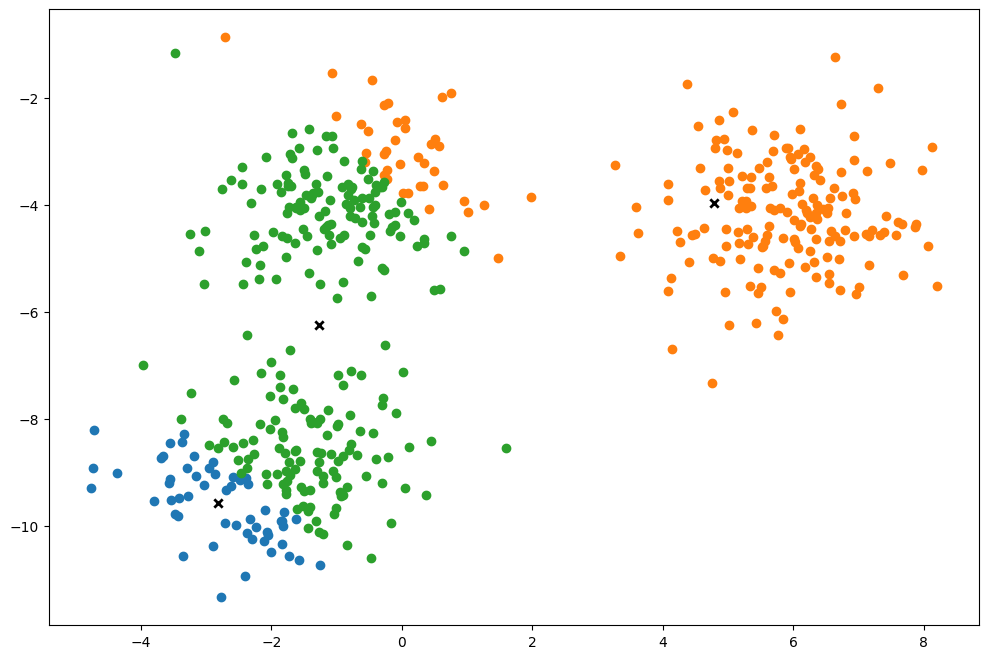

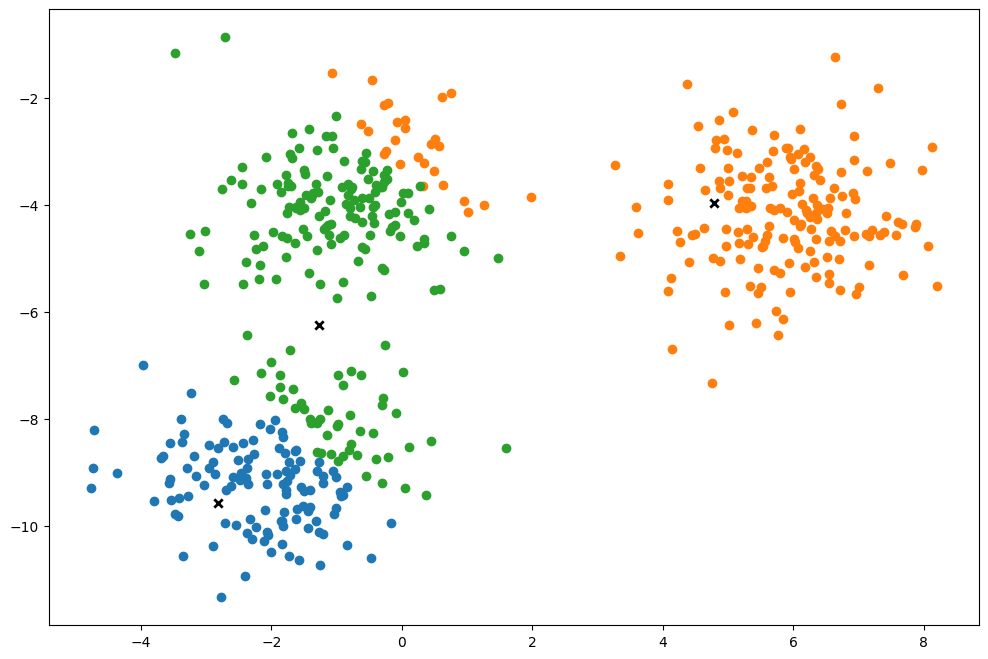

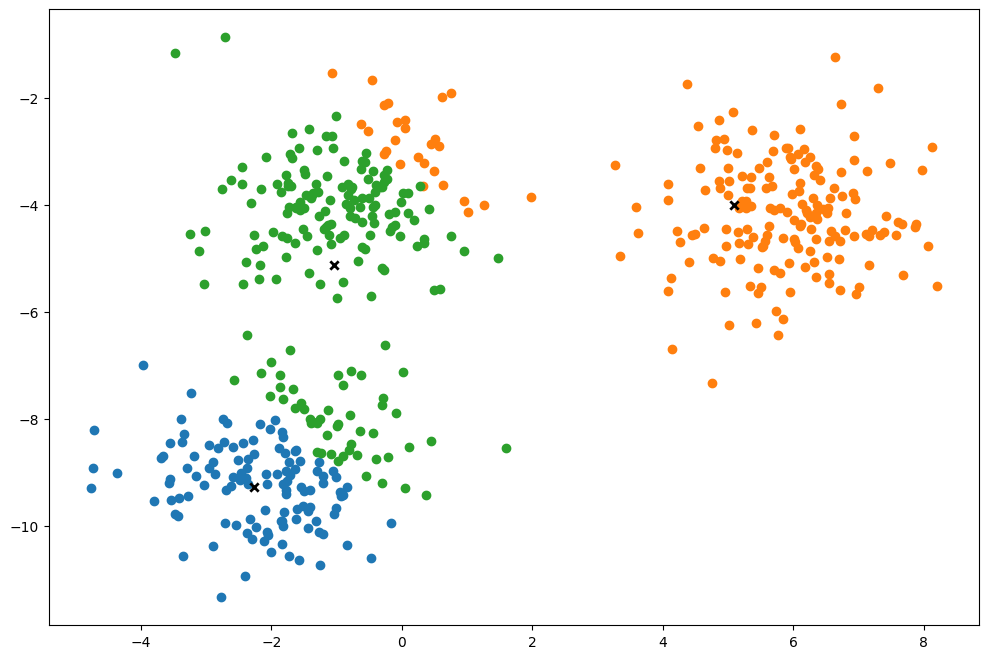

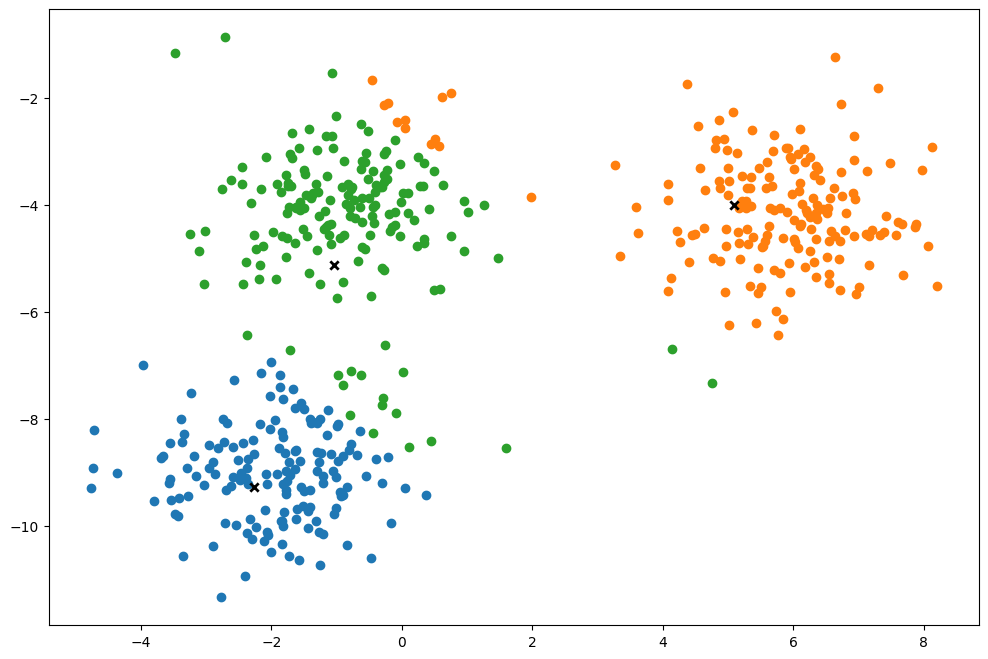

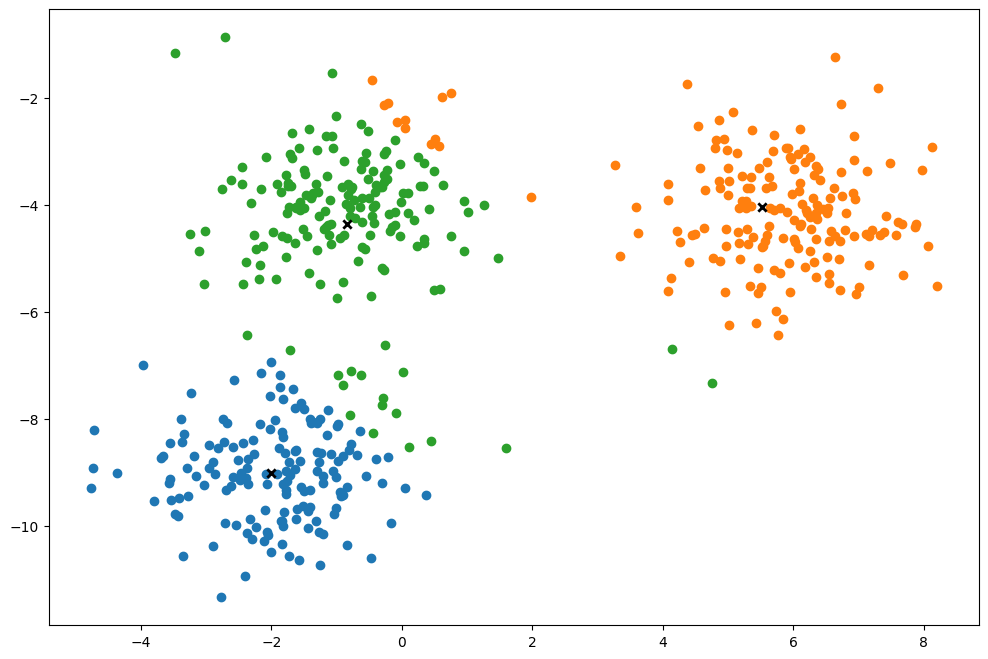

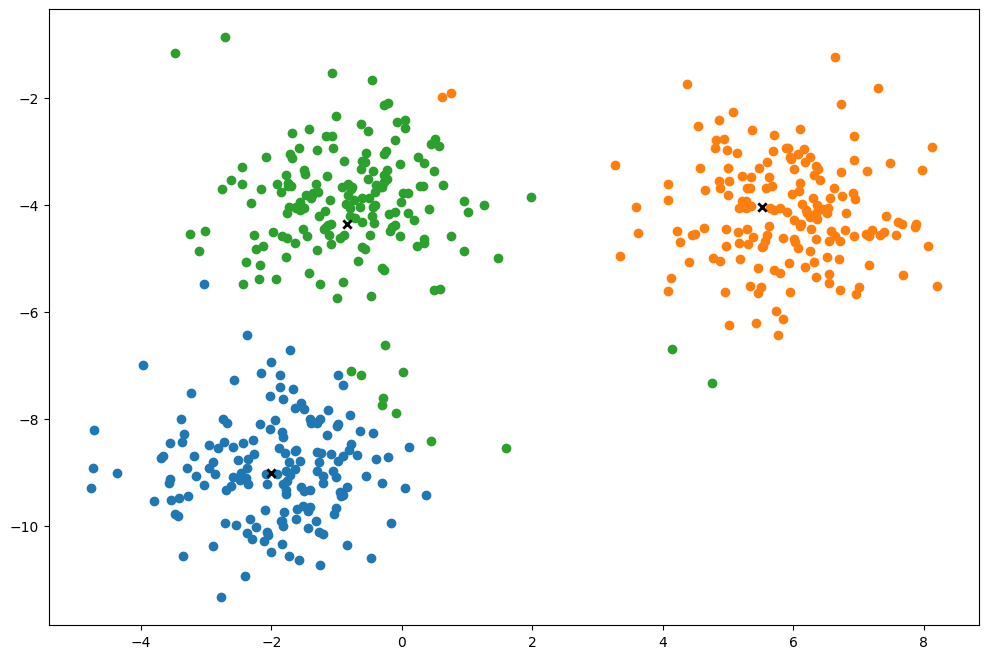

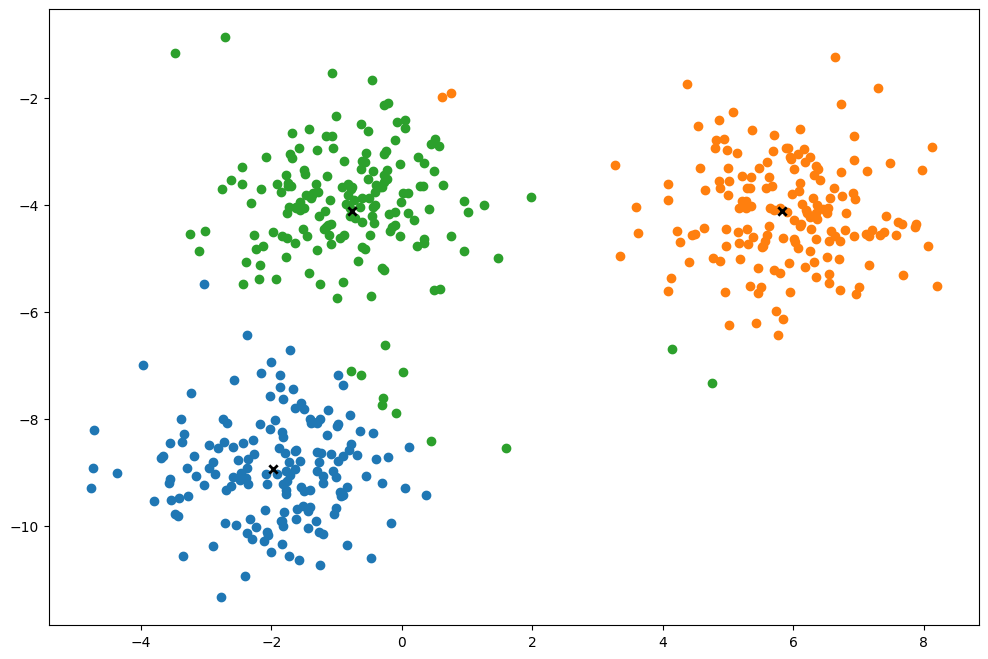

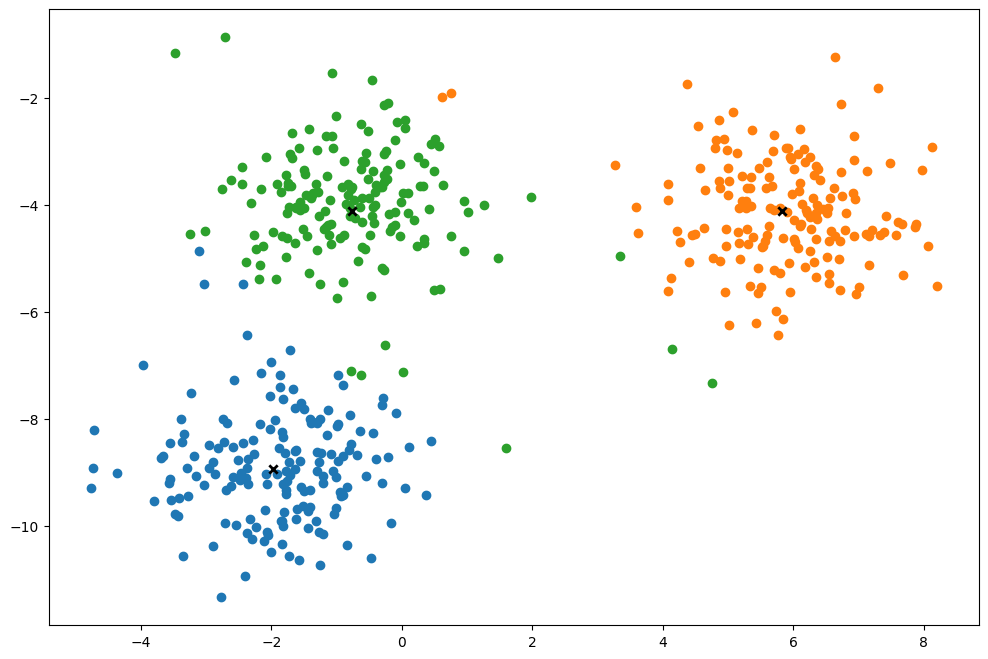

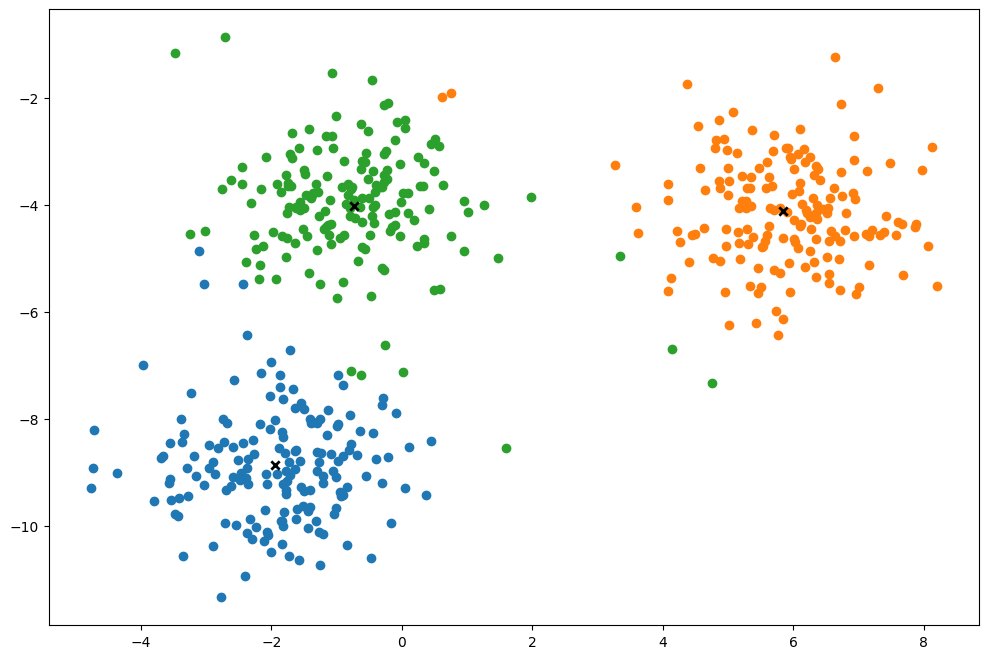

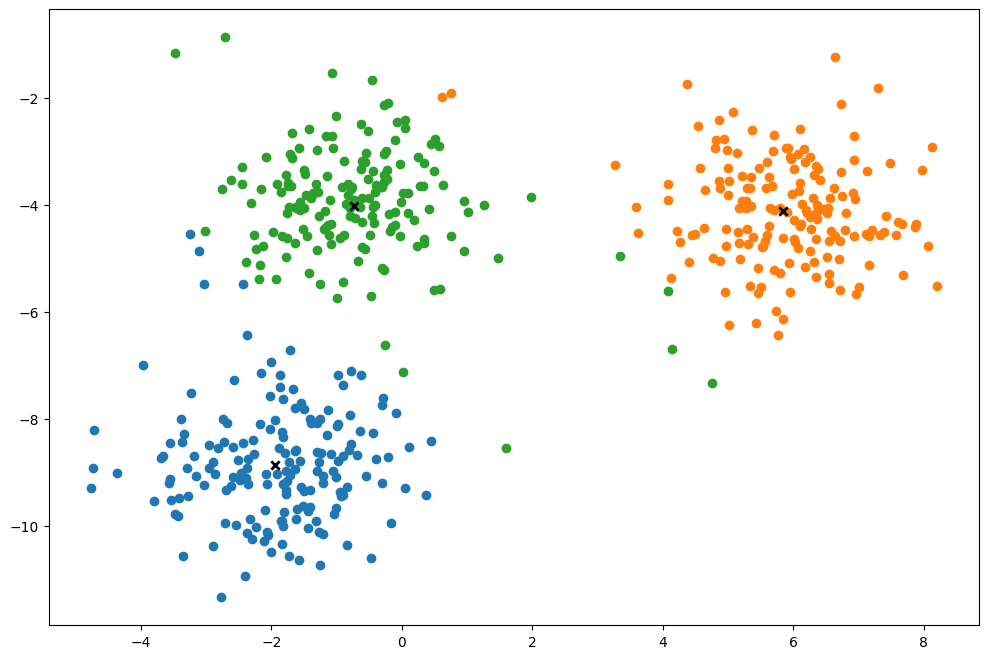

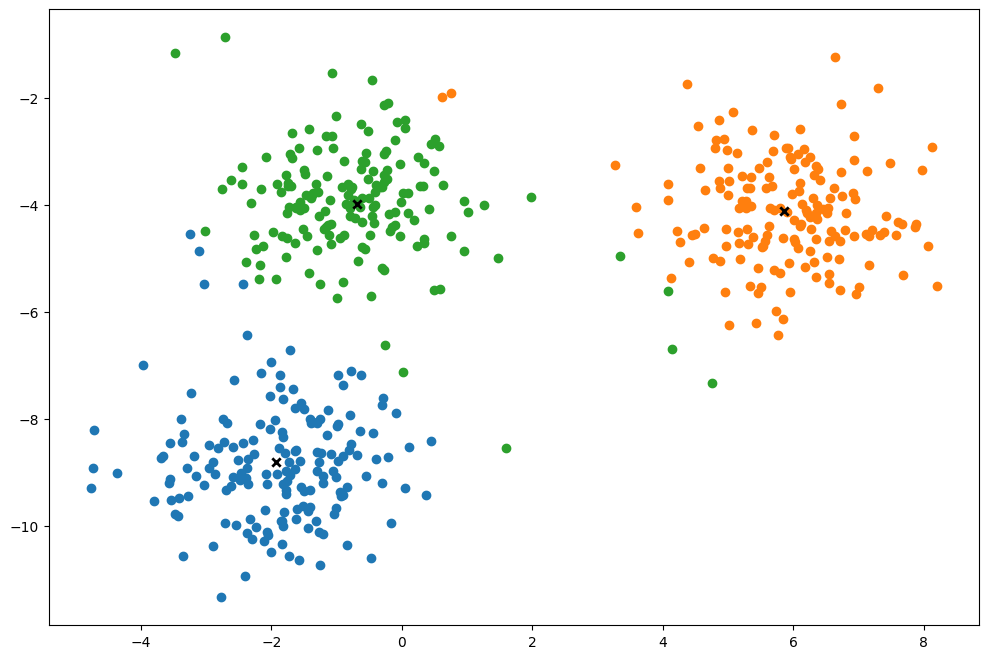

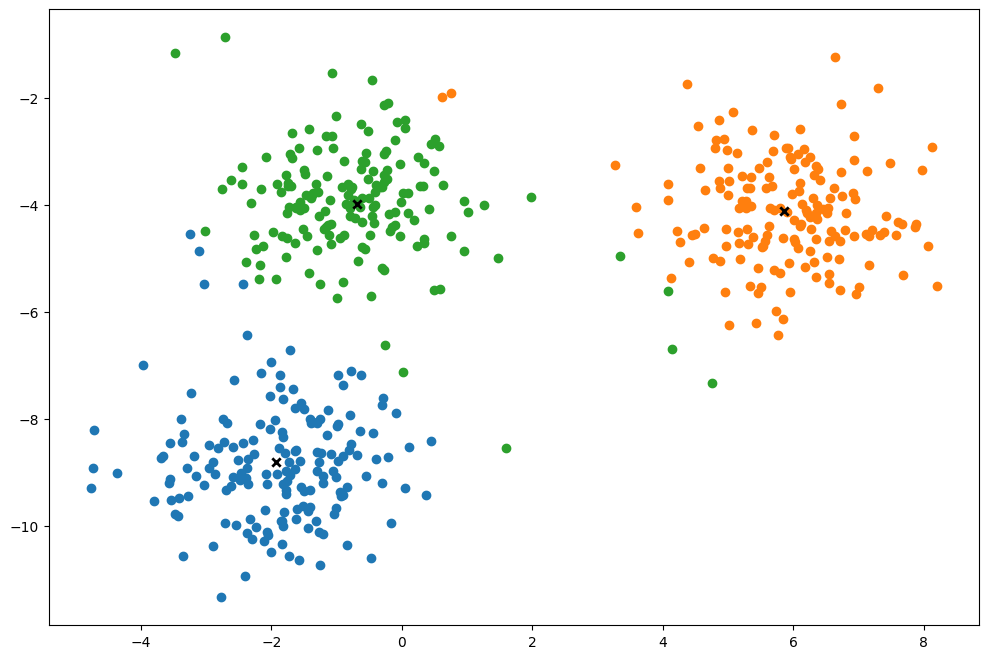

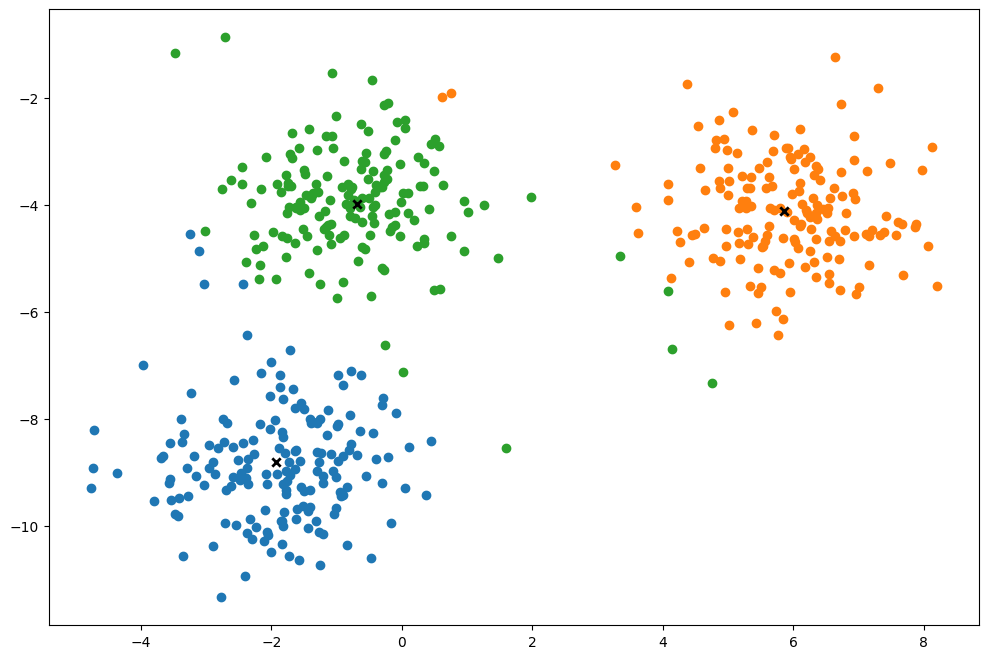

In [11]:
# Testing

if __name__ == '__main__':
    np.random.seed(42)
    X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()